In [1]:
## high-performance data manipulation and analysis tool 
import pandas as pd

#data visualization and graphical plotting library for Python and its numerical extension NumPy
import matplotlib.pyplot as plt

#a large library of high-level mathematical functions to operate on matrices and arrays
import numpy as np

#to interact with the underlying operating system
import os

#For ignoring Warning
import warnings
warnings.filterwarnings("ignore")

# For splitting the data into train and test
from sklearn.model_selection import train_test_split

# Standardizing(mean is 0 and sd is 1 .i.e. Normal Distribution) for convenient preprocessing 
from sklearn.preprocessing import StandardScaler

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [2]:
# pip install tensorflow

In [3]:
os.getcwd()

'C:\\Users\\User\\Desktop\\Github\\Deep-Learning'

In [4]:
df = pd.read_csv('Churn_Modelling.csv',index_col='RowNumber')

In [5]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.drop(['CustomerId', 'Surname'],axis = 1, inplace= True)

In [7]:
df.shape

(10000, 11)

In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [11]:
X = df.iloc[:, :10]
y = df.iloc[:, 10]
# X.columns
y.head()

RowNumber
1    1
2    0
3    1
4    0
5    0
Name: Exited, dtype: int64

In [12]:
# Creating dummies for geography and gender column and droping the first

X= pd.get_dummies(X,prefix=['Geography','Gender'], columns=['Geography','Gender'],drop_first=True)

In [13]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,0,1
9997,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9998,709,36,7,0.00,1,0,1,42085.58,0,0,0


In [14]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [15]:
X.shape

(10000, 11)

In [16]:
y.shape

(10000,)

In [17]:
X.shape

(10000, 11)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [19]:
std_scaler = StandardScaler()

In [20]:
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

In [21]:
# Initialising the ANN
classifier = Sequential()

In [26]:
# Adding the input layer and the first hidden layer
classifier.add(Dense( units = 
                     6, kernel_initializer='he_uniform',activation='relu',input_dim = 11))
classifier.add(Dropout(0.2))

In [27]:
# Adding the second hidden layer
classifier.add(Dense(units =  6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(0.3))

In [28]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))

In [29]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
import tensorflow as tf
EarlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [31]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 1000,callbacks =EarlyStopping )

Epoch 1/1000
536/536 [==============================] - 4s 4ms/step - loss: 1.0125 - accuracy: 0.5439 - val_loss: 0.5818 - val_accuracy: 0.7770
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.6444 - accuracy: 0.7152 - val_loss: 0.5325 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.5764 - accuracy: 0.7630 - val_loss: 0.5185 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.5411 - accuracy: 0.7832 - val_loss: 0.5085 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.5172 - accuracy: 0.7916 - val_loss: 0.5016 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.5086 - accuracy: 0.7927 - val_loss: 0.4961 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4998 - accuracy: 0.7960 - val_loss: 0.4915 - val_accuracy:

536/536 [==============================] - 2s 3ms/step - loss: 0.3943 - accuracy: 0.8356 - val_loss: 0.3890 - val_accuracy: 0.8425
Epoch 58/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3912 - accuracy: 0.8350 - val_loss: 0.3877 - val_accuracy: 0.8429
Epoch 59/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3831 - accuracy: 0.8434 - val_loss: 0.3864 - val_accuracy: 0.8413
Epoch 60/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3877 - accuracy: 0.8408 - val_loss: 0.3864 - val_accuracy: 0.8417
Epoch 61/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3887 - accuracy: 0.8356 - val_loss: 0.3867 - val_accuracy: 0.8421
Epoch 62/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3834 - accuracy: 0.8418 - val_loss: 0.3865 - val_accuracy: 0.8429
Epoch 63/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3853 - accuracy: 0.8360 - val_loss: 0.3855 - val_accuracy: 0.8429

536/536 [==============================] - 2s 3ms/step - loss: 0.3791 - accuracy: 0.8455 - val_loss: 0.3765 - val_accuracy: 0.8432
Epoch 114/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3755 - accuracy: 0.8489 - val_loss: 0.3754 - val_accuracy: 0.8459
Epoch 115/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3748 - accuracy: 0.8444 - val_loss: 0.3755 - val_accuracy: 0.8455
Epoch 116/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3762 - accuracy: 0.8451 - val_loss: 0.3749 - val_accuracy: 0.8459
Epoch 117/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3802 - accuracy: 0.8446 - val_loss: 0.3755 - val_accuracy: 0.8448
Epoch 118/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3741 - accuracy: 0.8481 - val_loss: 0.3752 - val_accuracy: 0.8444
Epoch 119/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3715 - accuracy: 0.8485 - val_loss: 0.3757 - val_accuracy: 

536/536 [==============================] - 2s 3ms/step - loss: 0.3697 - accuracy: 0.8524 - val_loss: 0.3730 - val_accuracy: 0.8455
Epoch 170/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3698 - accuracy: 0.8524 - val_loss: 0.3722 - val_accuracy: 0.8448
Epoch 171/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3755 - accuracy: 0.8464 - val_loss: 0.3729 - val_accuracy: 0.8451
Epoch 172/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3682 - accuracy: 0.8492 - val_loss: 0.3729 - val_accuracy: 0.8444
Epoch 173/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3716 - accuracy: 0.8451 - val_loss: 0.3733 - val_accuracy: 0.8448
Epoch 174/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3743 - accuracy: 0.8461 - val_loss: 0.3729 - val_accuracy: 0.8440
Epoch 175/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3716 - accuracy: 0.8474 - val_loss: 0.3733 - val_accuracy: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


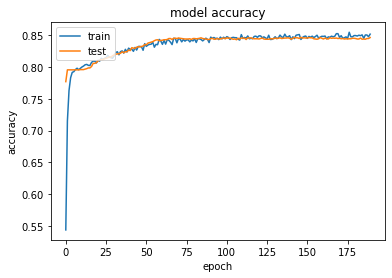

In [32]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

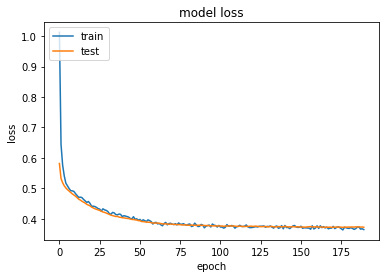

In [33]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [36]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.864